In [4]:
# ERP_visual
#!pip install cartopy
import cartopy.crs as ccrs # import projections
import cartopy.feature as cf # import features
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import seaborn as sns
import pickle

In [5]:
from netCDF4 import Dataset
import numpy as np

# Read longitude and latitude
nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
lon = nc_albroof.variables['lon'][:]
lat = nc_albroof.variables['lat'][:]

# Find the index ranges corresponding to the longitude and latitude bounds
lon_mask = (lon >= -2.8) & (lon <= -1.8)
lat_mask = (lat >= 53.3) & (lat <= 53.75)
# Convert boolean masks to index arrays
lon_idx = np.where(lon_mask)[0]
lat_idx = np.where(lat_mask)[0]

# Extract longitude and latitude for Manchester
# pcolormesh expects 2D longitude and latitude grids; if 1D, expand with meshgrid
lon_Man = lon[lon_idx]
lat_Man = lat[lat_idx]
lon_grid, lat_grid = np.meshgrid(lon_Man, lat_Man)

# Open NetCDF files sequentially
nc_emroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_albimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_WALL_1km_masked_gapfilled_QC.nc', mode='r')
nc_emwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_WALL_1km_masked_gapfilled_QC.nc', mode='r')
# nc_windhgtcanyon = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WIND_HGT_CANYON_1km_masked_gapfilled_QC.nc', mode='r')
nc_htroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_HT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_canyonhwr = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_CANYON_HWR_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtlunitroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTLUNIT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtroadperv = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTROAD_PERV_1km_masked_gapfilled_QC.nc', mode='r')

# Read variables for the Manchester subset (using inclusive index slicing)
albroof_Man = nc_albroof.variables['ALB_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albroof.close()
print('1')
emroof_Man = nc_emroof.variables['EM_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emroof.close()
print('2')
albimproad_Man = nc_albimproad.variables['ALB_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albimproad.close()
print('3')
emimproad_Man = nc_emimproad.variables['EM_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emimproad.close()
print('4')
albperroad_Man = nc_albperroad.variables['ALB_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albperroad.close()
print('5')
emperroad_Man = nc_emperroad.variables['EM_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emperroad.close()
print('6')
albwall_Man  = nc_albwall.variables['ALB_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albwall.close()
print('7')
emwall_Man = nc_emwall.variables['EM_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emwall.close()
print('8')
# windhgtcanyon_Man = nc_windhgtcanyon.variables['WIND_HGT_CANYON'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
# nc_windhgtcanyon.close()
# print('9')
htroof_Man = nc_htroof.variables['HT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_htroof.close()
print('9')
canyonhwr_Man = nc_canyonhwr.variables['CANYON_HWR'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_canyonhwr.close()
print('10')
wtlunitroof_Man = nc_wtlunitroof.variables['WTLUNIT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtlunitroof.close()
print('11')
wtroadperv_Man = nc_wtroadperv.variables['WTROAD_PERV'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtroadperv.close()
print('12')

# Determine the 2D shape of each variable
height, width = albroof_Man.shape

# Number of features read (replace with actual count if different)
num_features = 12

# Create a 3D array with shape (num_features, height, width)
features = np.empty((num_features, height, width), dtype=albroof_Man.dtype)

# Store each variable into the features array (indices correspond to your feature order)
features[0, :, :] = albroof_Man
features[1, :, :] = emroof_Man
features[2, :, :] = albimproad_Man
features[3, :, :] = emimproad_Man
features[4, :, :] = albperroad_Man
features[5, :, :] = emperroad_Man
features[6, :, :] = albwall_Man
features[7, :, :] = emwall_Man
# features[8, :, :] = windhgtcanyon_Man
features[8, :, :] = htroof_Man
features[9, :, :] = canyonhwr_Man
features[10, :, :] = wtlunitroof_Man
features[11, :, :] = wtroadperv_Man 

print(features.shape)
display(emroof_Man[0,0])
display(features[:, 0, 0])

# Flatten the 5th feature (index 4) as an example
ff = features[4, :, :]
ff_flat = ff.reshape(-1)
print(ff_flat.shape)

1
2
3
4
5
6
7
8
9
10
11
12
(12, 50, 112)


masked

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

(5600,)


In [6]:
target = 'HIA'
target_name_max = target + 'max'
target_name_mean = target + 'mean'
automl_max = pickle.load(open('ERP_automl_model_' + target_name_max + '.pkl', 'rb'))
automl_mean = pickle.load(open('ERP_automl_model_' + target_name_mean + '.pkl', 'rb'))

d:\python_Anaconda_install\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-07 15:49:11,614	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-09-07 15:49:12,001	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [7]:
num_features, height, width = features.shape
# Reshape features so each grid cell is a sample (assume each grid cell is one sample)
# X = features.reshape(num_features, height * width).T  # to (height*width, 13)
X_klaml = features.reshape(num_features, -1).T
print(X_klaml.shape)

y_pred_klaml_max = automl_max.predict(X_klaml)
y_pred_grid_klaml_max = y_pred_klaml_max.reshape(height, width)

y_pred_klaml_mean = automl_mean.predict(X_klaml)
y_pred_grid_klaml_mean = y_pred_klaml_mean.reshape(height, width)
# kff = X_klaml[:,4]
# print(kff.shape)

# Create a mask for grid cells that are entirely NaN across all features
# (True where all feature layers at that grid cell are NaN)
nan_mask = np.isnan(features).all(axis=0)  # shape (H, W), True only if all feature layers are NaN

# Use the mask to set predicted values at those grid cells to NaN
y_pred_grid_klaml_max[nan_mask] = np.nan
y_pred_grid_klaml_mean[nan_mask] = np.nan

(5600, 12)


In [8]:

import shap
feature_names = [
    'ALB ROOF',         # features[0, :, :]
    'EM ROOF',          # features[1, :, :]
    'ALB IMPROAD',      # features[2, :, :]
    'EM IMPROAD',       # features[3, :, :]
    'ALB PERROUD',      # features[4, :, :]
    'EM PERROUD',       # features[5, :, :]
    'ALB WALL',         # features[6, :, :]
    'EM WALL',          # features[7, :, :]
    # 'WIND HGT CANYON',   # features[8, :, :]
    'HT ROOF',          # features[9, :, :]
    'CANYON HWR',       # features[10, :, :]
    'WTLUNIT ROOF',     # features[11, :, :]
    'WTROAD PERV',      # features[12, :, :]
]

In [10]:
# Load explainer for the max model
model_klaml_max = automl_max.model.estimator
explainer_klaml_max = shap.TreeExplainer(model_klaml_max)
# Load SHAP values
shap_values_klaml_max = np.load('ERP_automl_model_' + target_name_max + '_shap.npy')  # shape = (n_samples, n_features)

# Load explainer for the mean model
model_klaml_mean = automl_mean.model.estimator
explainer_klaml_mean = shap.TreeExplainer(model_klaml_mean)
# Load SHAP values
shap_values_klaml_mean = np.load('ERP_automl_model_' + target_name_mean + '_shap.npy')  # shape = (n_samples, n_features)

In [11]:

X_df = pd.DataFrame(X_klaml, columns=feature_names)

valid_mask = ~X_df.isnull().all(axis=1)
X_df = X_df[valid_mask]
print(X_df.shape)


(4596, 12)


In [12]:
# plt.figure(figsize=(10, 6))
# plt.xlim([-3, 6]) 
# # shap.plots.beeswarm(explainer_klaml_max(X_df), show=False)
# plt.savefig('ERP_' + target_name_max + '_shap_summary.png', dpi=300, bbox_inches='tight')
# plt.show()
# plt.close()

# shap.plots.beeswarm(explainer_klaml_max(X_df), show=False)
# shap.plots.beeswarm(explainer_klaml_mean(X_df), show=False)
# plt.savefig('ERP_' + target + '_shap_beeswarm.png', dpi=300, bbox_inches='tight') 

# plt.show()
# plt.close()

In [13]:
# plt.figure(figsize=(10, 6))
# shap.summary_plot(explainer_klaml_max(X_df), plot_type='bar', show=False)
# shap.summary_plot(explainer_klaml_mean(X_df), plot_type='bar', show=False)

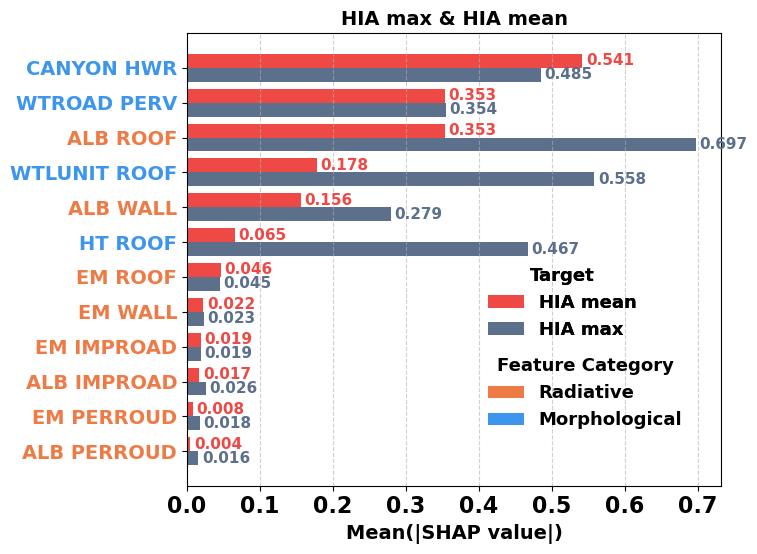

In [14]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({
    'font.size': 22,
    'font.weight': 'bold',
    'axes.titlesize': 30,
    'axes.titleweight': 'bold',
    'axes.labelsize': 22,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 28,
    'legend.title_fontsize': 20
})

feature_names = [
    'ALB ROOF', 'EM ROOF', 'ALB IMPROAD', 'EM IMPROAD',
    'ALB PERROUD', 'EM PERROUD', 'ALB WALL', 'EM WALL',
    'HT ROOF', 'CANYON HWR', 'WTLUNIT ROOF', 'WTROAD PERV'
]

# Assume you have these explainers and a DataFrame or 2D array X_df of inputs
shap_vals_max = explainer_klaml_max(X_df).values  # numpy array (n_samples, n_features)
shap_vals_mean = explainer_klaml_mean(X_df).values

abs_mean_max = np.abs(shap_vals_max).mean(axis=0)
abs_mean_mean = np.abs(shap_vals_mean).mean(axis=0)

df_shap = pd.DataFrame({
    'Feature': feature_names,
    'Max': abs_mean_max,
    'Mean': abs_mean_mean
}).set_index('Feature')

df_shap = df_shap.sort_values(by='Mean', ascending=False)

feature_category = {
    'ALB ROOF': 'Radiative', 'EM ROOF': 'Radiative', 'ALB IMPROAD': 'Radiative', 'EM IMPROAD': 'Radiative',
    'ALB PERROUD': 'Radiative', 'EM PERROUD': 'Radiative', 'ALB WALL': 'Radiative', 'EM WALL': 'Radiative',
    'HT ROOF': 'Morphological', 'CANYON HWR': 'Morphological', 'WTLUNIT ROOF': 'Morphological',
    'WTROAD PERV': 'Morphological'
}

Radia_color = "#ee7b46"
Morph_color = "#3D95ED"

Max_color = "#5C6F8B"
Mean_color = "#ef4946"
color_map = {'Radiative': Radia_color, 'Morphological': Morph_color}

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4
indices = np.arange(len(df_shap))

# mean bars at base (y = indices)
ax.barh(indices, df_shap['Mean'], bar_width, label='HIA mean', color=Mean_color)
# max bars above mean (y = indices + bar_width)
ax.barh(indices + bar_width, df_shap['Max'], bar_width, label='HIA max', color=Max_color)

ax.set_yticks(indices + bar_width / 2)
ax.set_yticklabels(df_shap.index)
ax.invert_yaxis()

for label in ax.get_yticklabels():
    text = label.get_text()
    if text in feature_category:
        label.set_color(color_map[feature_category[text]])
        label.set_fontweight('bold')
        label.set_fontsize(14)

for i, (val_max, val_mean) in enumerate(zip(df_shap['Max'], df_shap['Mean'])):
    ax.text(val_max + 0.005, i + bar_width, f'{val_max:.3f}', va='center', color=Max_color, fontsize=11, fontweight='bold')
    ax.text(val_mean + 0.005, i, f'{val_mean:.3f}', va='center', color=Mean_color, fontsize=11, fontweight='bold')

ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.set_xlabel('Mean(|SHAP value|)', fontsize=14)
ax.set_title(target + ' max & ' + target + ' mean', fontsize=14, fontweight='bold')

# Feature category legend
feature_legend_labels = list(color_map.keys())
feature_legend_colors = list(color_map.values())
feature_legend_elements = [Patch(facecolor=c, label=l) for l, c in zip(feature_legend_labels, feature_legend_colors)]

# Model type legend
model_legend_labels = [target + ' mean', target + ' max']
model_legend_colors = [Mean_color, Max_color]
model_legend_elements = [Patch(facecolor=c, label=l) for l, c in zip(model_legend_labels, model_legend_colors)]

legend1 = ax.legend(handles=feature_legend_elements, title='Feature Category', fontsize=13, title_fontsize=13,
                    loc='upper left', bbox_to_anchor=(0.55, 0.3), borderaxespad=0, frameon=False)

legend2 = ax.legend(handles=model_legend_elements, title='Target', fontsize=13, title_fontsize=13,
                    loc='upper left', bbox_to_anchor=(0.55, 0.5), borderaxespad=0, frameon=False)

ax.add_artist(legend1)
ax.add_artist(legend2)

plt.tight_layout()
plt.savefig('ERP_' + target + '_maxmeansummarty.png', dpi=300, bbox_inches='tight')
plt.show()